# Annotation: 
## Supplementary Table 2.Read raw counts. <br>
The following acronyms were used: <br>

## Experiment Designs:
V: Vialone Nano; B: Baldo; <br>
R: root; L: leaves; 

## 2 Experimental Conditions: 
T: treated (3 days salt-stressed seedlings); 
C: control (without salt stress); 
1,2,3 suffices stand for technical replicates.

In [23]:
import pandas as pd
import numpy as np
from math import *
from scipy.stats import ttest_ind

df = pd.read_csv('rna_data.csv', header=0, low_memory=False)
df['p_score'] = nan
#df

In [24]:
# Vialone Nano - Leaf 
data_set1 = df[['VLT1','VLT2','VLT3']].to_numpy()
data_set2 = df[['VLC1','VLC2','VLC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()
#df

In [25]:
# Vialone Nano - Root 
data_set1 = df[['VRT1','VRT2','VRT3']].to_numpy()
data_set2 = df[['VRC1','VRC2','VRC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()
#df

In [26]:
# Baldo - Leaf 
data_set1 = df[['BLT1','BLT2','BLT3']].to_numpy()
data_set2 = df[['BLC1','BLC2','BLC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()
#df

In [27]:
# Baldo - Root 
data_set1 = df[['BRT1','BRT2','BRT3']].to_numpy()
data_set2 = df[['BRC1','BRC2','BRC3']].to_numpy()

for i in range(len(df)):
    df.at[i,'p_score'] =  ttest_ind(data_set1[i], data_set2[i])[1] 

df = df[df['p_score'] < 0.01]
df = df.dropna()

In [28]:
# Finding folds:
df['VL_fold'] = np.log2(df[['VLT1','VLT2','VLT3']].mean(axis=1) / df[['VLC1','VLC2','VLC3']].mean(axis=1))
df['VR_fold'] = np.log2(df[['VRT1','VRT2','VRT3']].mean(axis=1) / df[['VRC1','VRC2','VRC3']].mean(axis=1))
df['BL_fold'] = np.log2(df[['BLT1','BLT2','BLT3']].mean(axis=1) / df[['BLC1','BLC2','BLC3']].mean(axis=1))
df['BR_fold'] = np.log2(df[['BRT1','BRT2','BRT3']].mean(axis=1) / df[['BRC1','BRC2','BRC3']].mean(axis=1))

df = df[['GenID','VL_fold','VR_fold','BL_fold','BR_fold']]
df = df.set_index('GenID')
df


C:\Users\DHRUBO\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,VL_fold,VR_fold,BL_fold,BR_fold
GenID,,,,
Os01g39136,2.900990,0.102362,1.602036,0.090198
Os01g40570,0.615336,0.117826,0.435114,-0.126542
Os01g41220,0.678072,-0.023818,0.596858,0.055315
Os01g41240,-1.169925,2.063879,-0.809948,1.963474
Os01g41550,0.854372,0.382079,0.396890,0.686531
...,...,...,...,...
Os12g43750,1.300395,-0.427306,0.755266,0.015597
Os12g43870,1.448461,2.584963,0.703018,2.584963
Os12g43930,0.899945,0.298314,0.691994,0.070959


<AxesSubplot:ylabel='GenID'>

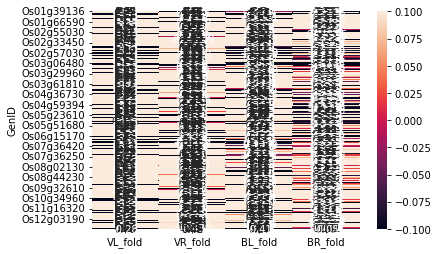

In [349]:
# heatmap to show the fold change in differentially expressed genes. 
import seaborn as sns
sns.heatmap(df, annot=True)